In [33]:
#Import packages
import os

import numpy as np
import pandas as pd
import datetime as dt
import pandas_profiling
import re as re

import scipy.stats as stats
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import sklearn.preprocessing as preprocess
import sklearn.feature_selection as feature_selection

import statsmodels as st
import statsmodels.formula.api as smp
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Checking working directory
%pwd

'C:\\Users\\PHANI KUMAR\\Desktop\\Python Machine Learning\\1. Case Study - Automobile Example - Class Exercise'

In [3]:
#Reading the data
car_sales = pd.read_csv("Car_sales.csv")

In [5]:
car_sales.head()

,Manufacturer,Model,Sales_in_thousands,four_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [8]:
#Desriptive statistics 
profile_report = pandas_profiling.ProfileReport(car_sales)
profile_report

In [7]:
profile_report.to_file("Pandas profile report.html")

In [9]:
car_sales["Latest_Launch"] = pd.to_datetime(car_sales["Latest_Launch"])

In [21]:
cat_vars = ["Manufacturer", "Model", "Vehicle_type","Latest_Launch"]
num_vars = ['Sales_in_thousands', 'four_year_resale_value', 'Price_in_thousands', 
            'Engine_size', 'Horsepower','Wheelbase', 'Width', 'Length', 'Curb_weight',
            'Fuel_capacity','Fuel_efficiency','Power_perf_factor']

In [22]:
data_cat = car_sales[cat_vars]
data_num = car_sales[num_vars]

In [23]:
#Handling Outliers 
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num = data_num.apply(outlier_capping)

In [24]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

In [25]:
#Handling missings - Method2
def Cat_Missing_imputation(x):
    x = x.fillna(x.mode())
    return x
data_cat=data_cat.apply(lambda x: Cat_Missing_imputation(x))

In [26]:
data_final = pd.concat([data_num, data_cat], axis=1)

In [29]:
#Removed date column as it cannot be used in linear regression
data_final.drop(["Latest_Launch"],axis = 1,inplace = True)

In [30]:
data_final.head()

,Sales_in_thousands,four_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Manufacturer,Model,Vehicle_type
0,16.919,16.360,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,Acura,Integra,Passenger
1,39.384,19.875,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,Acura,TL,Passenger
2,14.114,18.225,22.799,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,72.030917,Acura,CL,Passenger
3,8.588,29.725,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,Acura,RL,Passenger
4,20.397,22.255,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,Audi,A4,Passenger


In [31]:
data_cat["Price_in_thousands"] = data_num["Price_in_thousands"]

In [65]:
data_final = pd.get_dummies(data_final, ['Manufacturer','Model','Vehicle_type'], drop_first=True)

In [316]:
#Calculating CV for all the variables 
cv_vars = data_final.apply(lambda x: np.mean(x)/np.std(x))

In [68]:
cv_vars.to_csv('cv.csv')

No variable is less than 0.05 when calculated the co variance. so proceeding with next step without removing variables


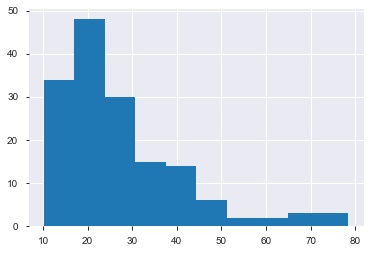

In [69]:
data_final.Price_in_thousands.hist()

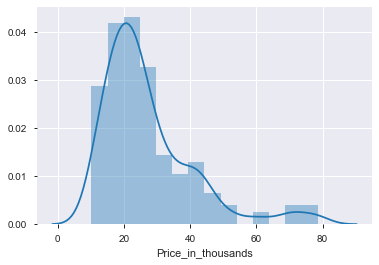

In [72]:
sns.distplot(data_final.Price_in_thousands)

In [73]:
data_final['ln_Price_in_thousands'] = np.log(data_final.Price_in_thousands)

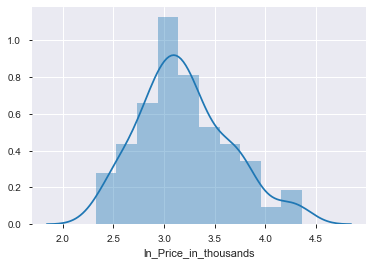

In [78]:
#Data is normally distributed after converting it to log form
sns.distplot(data_final.ln_Price_in_thousands)

In [314]:
# Looking at the assumptions - Linearity
corr_mat = data_final.corr()

In [80]:
corr_mat.to_csv('corr_mat.csv')

In [81]:
#Variables selected on the basis of correlation
#four_year_resale_value
#Engine_size
#Horsepower
#Width
#Curb_weight
#Fuel_capacity
#Power_perf_factor
#Fuel_efficiency


In [82]:
#Feature Selection
features = data_final[data_final.columns.difference( ['ln_Price_in_thousands', 'Price_in_thousands'] )]
target = data_final['ln_Price_in_thousands']

In [83]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import itertools

#lm = LinearRegression()
lm = RandomForestRegressor()

# create the RFE model and select 10 attributes
rfe = RFE(lm, n_features_to_select=13)
rfe = rfe.fit(features, target)
rfe

RFE(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                    max_depth=None, max_features='auto',
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    n_estimators='warn', n_jobs=None,
                                    oob_score=False, random_state=None,
                                    verbose=0, warm_start=False),
    n_features_to_select=13, step=1, verbose=0)

In [84]:
features.columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac',
       ...
       'Model_Voyager', 'Model_Windstar', 'Model_Wrangler', 'Model_Xterra',
       'Power_perf_factor', 'Sales_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype='object', length=196)

In [85]:
rfe.support_

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [86]:
features.columns[rfe.support_]

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Ford', 'Manufacturer_Mercedes-B',
       'Power_perf_factor', 'Sales_in_thousands', 'Wheelbase', 'Width',
       'four_year_resale_value'],
      dtype='object')

In [87]:
#F-Regression # Feature Selection based on importance
from sklearn.feature_selection import f_regression
F_values, p_values  = f_regression(  features, target )

In [88]:
features.columns

Index(['Curb_weight', 'Engine_size', 'Fuel_capacity', 'Fuel_efficiency',
       'Horsepower', 'Length', 'Manufacturer_Audi', 'Manufacturer_BMW',
       'Manufacturer_Buick', 'Manufacturer_Cadillac',
       ...
       'Model_Voyager', 'Model_Windstar', 'Model_Wrangler', 'Model_Xterra',
       'Power_perf_factor', 'Sales_in_thousands', 'Vehicle_type_Passenger',
       'Wheelbase', 'Width', 'four_year_resale_value'],
      dtype='object', length=196)

In [91]:
itertools.zip_longest(features.columns, F_values, p_values)

In [92]:
import itertools
f_reg_results = [(i, v, z) for i, v, z in itertools.zip_longest(features.columns, F_values,  ['%.3f' % p for p in p_values])]

In [93]:
f_reg_results=pd.DataFrame(f_reg_results, columns=['Variable','F_Value', 'P_Value'])

In [94]:
f_reg_results.sort_values(by=['F_Value'], ascending=False, inplace=True)

In [95]:
f_reg_results.to_csv('f_reg_results.csv')

In [96]:
print(f_reg_results)

                    Variable     F_Value P_Value
190        Power_perf_factor  926.036674   0.000
4                 Horsepower  560.533759   0.000
195   four_year_resale_value  184.711708   0.000
1                Engine_size  120.254692   0.000
0                Curb_weight  100.957539   0.000
3            Fuel_efficiency   82.585726   0.000
2              Fuel_capacity   51.765759   0.000
194                    Width   29.685238   0.000
21   Manufacturer_Mercedes-B   26.242341   0.000
191       Sales_in_thousands   25.104336   0.000
28      Manufacturer_Porsche   13.341757   0.000
19        Manufacturer_Lexus   10.241972   0.002
5                     Length   10.232139   0.002
30       Manufacturer_Saturn    8.395737   0.004
15      Manufacturer_Hyundai    7.738419   0.006
163           Model_SL-Class    7.030431   0.009
60               Model_CL500    7.030431   0.009
193                Wheelbase    6.955522   0.009
67      Model_Carrera Cabrio    6.465809   0.012
9      Manufacturer_

In [259]:
#Variance Inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
Final_list = [
'Horsepower',
#'Length',
#'Manufacturer_Ford',
'Manufacturer_Mercedes-B',
#'Curb_weight',
#'Engine_size',
#'Fuel_capacity',
#'Fuel_efficiency',
#'Power_perf_factor',
'Sales_in_thousands',
#'Wheelbase',
#'Width',
#'four_year_resale_value',
'Manufacturer_Porsche',
'Manufacturer_Lexus',
#'Manufacturer_Saturn',
#'Manufacturer_Hyundai',
#'Model_SL-Class',
#'Model_CL500',
'Model_Carrera Cabrio',
#'Manufacturer_Cadillac',
#'Model_Carrera Coupe',
#'Model_Viper',
#'Model_S-Class',
#'Model_Neon',
#'Model_A8',
#'Manufacturer_Lincoln',
'Model_LX470',
'Manufacturer_Chevrolet'
]

X=features[Final_list]

In [260]:
# For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [261]:
vif.sort_values(by='VIF_Factor', ascending=False)

,VIF_Factor,features
0,2.053231,Horsepower
2,1.646325,Sales_in_thousands
3,1.567034,Manufacturer_Porsche
5,1.500756,Model_Carrera Cabrio
4,1.307311,Manufacturer_Lexus
6,1.200130,Model_LX470
1,1.147839,Manufacturer_Mercedes-B
7,1.063970,Manufacturer_Chevrolet


In [262]:
X = X.rename(columns={"Model_Carrera Coupe":"Model_Carrera_Coupe",
                                        "Model_Carrera Cabrio":"Model_Carrera_Cabrio",
                                         "Manufacturer_Mercedes-B":"Manufacturer_Mercedes_B",
                                         "Model_SL-Class":"Model_SL_Class",
                                         "Model_S-Class":"Model_S_Class"})

In [263]:
data_final1 = pd.concat([X,target],axis = 1)

In [264]:
#Split data into train and test
train, test = train_test_split(data_final1, test_size=0.3, random_state=111)

In [265]:
'ln_Price_in_thousands ~ ' + '+'.join(X.columns)

'ln_Price_in_thousands ~ Horsepower+Manufacturer_Mercedes_B+Sales_in_thousands+Manufacturer_Porsche+Manufacturer_Lexus+Model_Carrera_Cabrio+Model_LX470+Manufacturer_Chevrolet'

In [275]:
equation = 'ln_Price_in_thousands ~ Horsepower+Manufacturer_Mercedes_B+Sales_in_thousands+Manufacturer_Porsche+Model_LX470'

In [276]:
#smp.ols(formula = 'y~x1+x2+x3+x4', data=data_final)

ols_model = smp.ols(formula = equation, data=train)
ols_model_output = ols_model.fit()

In [278]:
print(ols_model_output.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Price_in_thousands   R-squared:                       0.866
Model:                               OLS   Adj. R-squared:                  0.860
Method:                    Least Squares   F-statistic:                     133.2
Date:                   Sun, 22 Dec 2019   Prob (F-statistic):           2.54e-43
Time:                           19:26:14   Log-Likelihood:                 47.686
No. Observations:                    109   AIC:                            -83.37
Df Residuals:                        103   BIC:                            -67.22
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [281]:
#Mathematical equation ln_Price_in_thousands =  2.0509+0.0064*Horsepower+0.3742*Manufacturer_Mercedes_B+
#-0.0012*Sales_in_thousands+0.3041*Manufacturer_Porsche+0.5927*Model_LX470)

#Price_in_thousands = exp(2.0509+0.0064*Horsepower+0.3742*Manufacturer_Mercedes_B+
#-0.0012*Sales_in_thousands+0.3041*Manufacturer_Porsche+0.5927*Model_LX470)

In [282]:
train_predicted = np.exp(ols_model_output.predict(train))
test_predicted = np.exp(ols_model_output.predict(test))

In [284]:
#Metrics (MAPE, RMSE, MSE, RMSPE)
train_actual = np.exp(train.ln_Price_in_thousands)
test_actual = np.exp(test.ln_Price_in_thousands)

In [285]:
train_RMSE = np.sqrt(np.mean(np.square(train_actual-train_predicted)))
test_RMSE  = np.sqrt(np.mean(np.square(test_actual-test_predicted)))

In [286]:
train_RMSE

4.29817382212366

In [287]:
test_RMSE

5.8468413618373765

In [289]:
#Mean absolute percentage error
train_MAPE = np.mean(np.abs(train_actual-train_predicted)/train_actual)
test_MAPE  = np.mean(np.abs(test_actual-test_predicted)/test_actual)

In [290]:
train_MAPE

0.12890242929900753

In [291]:
test_MAPE

0.16551701217147122

In [292]:
train_RMSPE = np.sqrt(np.mean(np.square((train_actual-train_predicted)/train_actual)))
test_RMSPE  = np.sqrt(np.mean(np.square((test_actual-test_predicted)/test_actual)))

In [293]:
train_RMSPE

0.15856146818331254

In [294]:
test_RMSPE

0.20357174039205977

In [295]:
np.corrcoef(train_actual, train_predicted)

array([[1.        , 0.94543145],
       [0.94543145, 1.        ]])

In [296]:
np.corrcoef(test_actual, test_predicted)

array([[1.       , 0.9280217],
       [0.9280217, 1.       ]])

In [297]:
#Check
#Errors following normal distribution
#Errors should not have relationship with Y

train_errors = train_actual-train_predicted
test_errors = test_actual-test_predicted

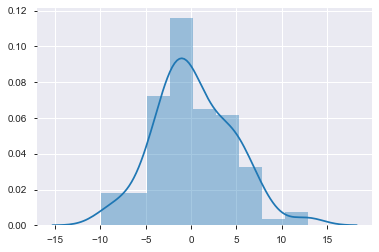

In [298]:
sns.distplot(train_errors)

In [307]:
np.corrcoef(train_actual, train_errors)

array([[1.        , 0.32303725],
       [0.32303725, 1.        ]])

In [300]:
#Decile analysis
train_results = pd.concat([train_actual, train_predicted], axis=1)
test_results = pd.concat([test_actual, test_predicted], axis=1)
train_results.columns = ['actual', 'pred']
test_results.columns = ['actual', 'pred']

In [310]:
train_results['Deciles']=pd.qcut(train_results['pred'],10, labels=False)
train_deciles = train_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

In [309]:
test_results['Deciles']=pd.qcut(test_results['pred'],10, labels=False)
test_deciles = test_results.groupby(['Deciles']).apply(mean)[['actual','pred']]

In [312]:
train_deciles.to_excel("train deciles.xlsx")
test_deciles.to_excel("test deciles.xlsx")

In [303]:
from sklearn.externals import joblib
joblib.dump(ols_model_output, 'ols_model')

['ols_model']

In [304]:
#### Lets save everything in metrics_df to pickle object
import pickle

# now you can save it to a file
with open('model_ols.pkl', 'wb') as f:
    pickle.dump(ols_model_output, f)

In [305]:
# and later you can load it
with open('model_ols.pkl', 'rb') as f:
    model = pickle.load(f)

In [306]:
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     ln_Price_in_thousands   R-squared:                       0.866
Model:                               OLS   Adj. R-squared:                  0.860
Method:                    Least Squares   F-statistic:                     133.2
Date:                   Sun, 22 Dec 2019   Prob (F-statistic):           2.54e-43
Time:                           19:36:53   Log-Likelihood:                 47.686
No. Observations:                    109   AIC:                            -83.37
Df Residuals:                        103   BIC:                            -67.22
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------